The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as acceleration and velocity

In [26]:
###### Math, Plotting, and Data Frames
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
###### Preprocessing and Hyperparameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
###### Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
###### Metrics and Scoring
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score

import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('X_train.csv')
test = pd.read_csv('X_test.csv')
target = pd.read_csv('y_train.csv')

In [3]:
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [4]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [5]:
target.head(15)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
5,5,1,tiled
6,6,34,soft_pvc
7,7,31,concrete
8,8,33,hard_tiles_large_space
9,9,11,tiled


In [6]:
print(train.shape)
print(test.shape)
print(target.shape)

(487680, 13)
(488448, 13)
(3810, 3)


In [7]:
# train.isnull().sum()
test.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

In [8]:
print(test.shape[0]-train.shape[0])

768


In [9]:
target.surface.nunique()

9

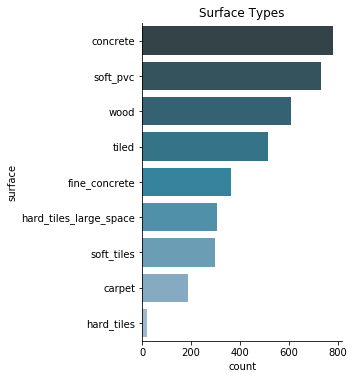

In [15]:
sns.catplot(y="surface", kind="count", order = target['surface'].value_counts().index, palette="PuBuGn_d", data=target)
plt.title("Surface Types")
plt.show()

In [16]:
full_train1 = pd.merge(train, target, on='series_id', how='inner')
full_train1.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


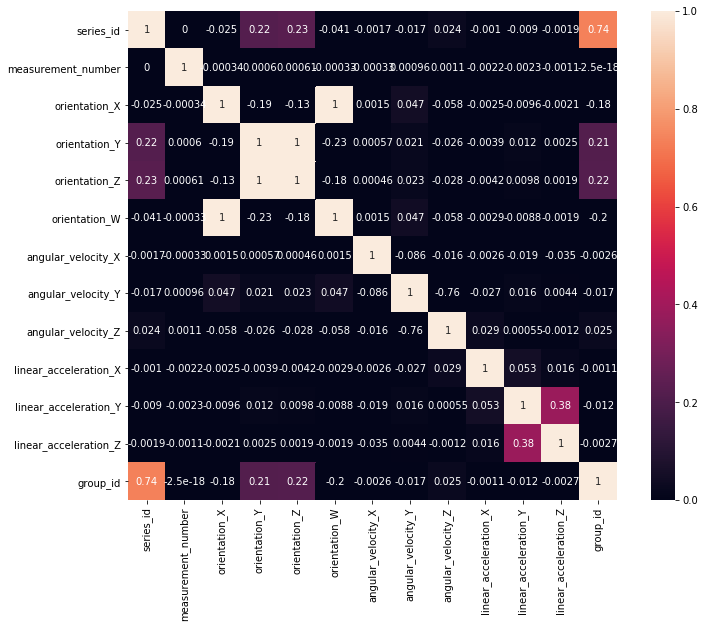

In [12]:
corrmat = full_train1.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, annot=True, vmin=0, vmax=1, square=True)
plt.show()

In [13]:
X_train = full_train1.drop(['surface'], axis=1)
y_train = full_train1['surface']

# Try out vanilla classifiers
classifiers = {
    "LogR": LogisticRegression(),
#     "KNN": KNeighborsClassifier(), #vanilla gave 5% accuracy
#     "SVC": SVC(),
    "RFC": RandomForestClassifier()
}

Classifiers:  LogisticRegression Has a 21.0 % training accuracy score
Classifiers:  RandomForestClassifier Has a 86.0 % training accuracy score


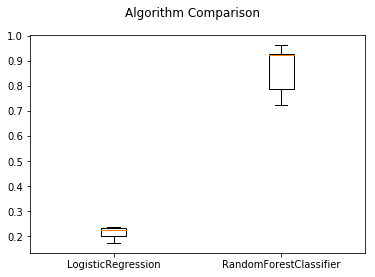

In [14]:
results = []
names = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    results.append(training_score)
    names.append(classifier.__class__.__name__)
    print("Classifiers: ", classifier.__class__.__name__, "Has a",
         round(training_score.mean(), 2) *100, "% training accuracy score")
    
# Boxplot algorithm model comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

vanilla random forrest worked significantly better than the other classifiers. Run it through grid search and check it's results. then try xgboost. to find feature importances. then try to engineer features. also figure out if conversion to Eurler angles makes a difference. I will not be encoding the labels because the are the the classes, they're not used computationally.


## Attempt 2

### Feature Engineering
I followed the competition guidelines, stackoverflow, and GPreda's kernel for addressing quaternions and getting back Euler angles (just XYZ)

In [17]:
# https://www.kaggle.com/gpreda/robots-need-help
# http://www.euclideanspace.com/physics/kinematics/angularvelocity/
# https://stackoverflow.com/questions/53033620/how-to-convert-euler-angles-to-quaternions-and-get-the-same-euler-angles-back-fr?rq=1
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

In [18]:
# quaternion-euler feature engineering
def euler_feature_engineering(df):
    df_out = pd.DataFrame()
    df['total_angular_velocity'] = np.sqrt(
        np.square(df['angular_velocity_X']) + np.square(df['angular_velocity_Y']) + np.square(df['angular_velocity_Z']))
    
    df['total_linear_acceleration'] = np.sqrt(
        np.square(df['linear_acceleration_X']) + np.square(df['linear_acceleration_Y']) + np.square(df['linear_acceleration_Z']))
    
    df['acc_vs_vel'] = df['total_linear_acceleration'] / df['total_angular_velocity']
    
    x, y, z, w = df['orientation_X'].tolist(), df['orientation_Y'].tolist(), df['orientation_Z'].tolist(), df['orientation_W'].tolist()
    
    nx, ny, nz = [], [], []
    
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
        
    df['euler_x'] = nx
    df['euler_y'] = ny
    df['euler_z'] = nz
    
    df['total_angle'] = np.sqrt(np.square(df['euler_x']) + np.square(df['euler_y']) + np.square(df['euler_z']))
    df['angle_vs_acc'] = df['total_angle'] / df['total_linear_acceleration']
    df['angle_vs_vel'] = df['total_angle'] / df['total_angular_velocity']
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))

    def mean_abs_change(x):
        return np.mean(np.abs(np.diff(x)))
    
    for col in df.columns:
        if col in ['row_id', 'series_id', 'measurement_number']:
            continue
        df_out[col + '_mean'] = df.groupby(['series_id'])[col].mean()
        df_out[col + '_min'] = df.groupby(['series_id'])[col].min()
        df_out[col + '_max'] = df.groupby(['series_id'])[col].max()
        df_out[col + '_std'] = df.groupby(['series_id'])[col].std()
        df_out[col + '_mad'] = df.groupby(['series_id'])[col].mad()
        df_out[col + '_med'] = df.groupby(['series_id'])[col].median()
        df_out[col + '_skew'] = df.groupby(['series_id'])[col].skew()
        df_out[col + '_max_to_min'] = df_out[col + '_max'] / df_out[col + '_min']
        df_out[col + '_mean_abs_change'] = df.groupby('series_id')[col].apply(mean_abs_change)
        df_out[col + '_mean_change_of_abs_change'] = df.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df_out[col + '_abs_max'] = df.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
        df_out[col + '_abs_min'] = df.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))
        df_out[col + '_abs_mean'] = df.groupby('series_id')[col].apply(lambda x: np.mean(np.abs(x)))
        df_out[col + '_abs_std'] = df.groupby('series_id')[col].apply(lambda x: np.std(np.abs(x)))

    return df_out

In [19]:
X_train = euler_feature_engineering(train)

In [20]:
X_test = euler_feature_engineering(test)

In [24]:
X_train.isnull().values.any(), X_test.isnull().values.any()

(False, False)

In [25]:
X_train.replace(-np.inf, 0, inplace = True)
X_train.replace(np.inf, 0, inplace = True)
X_test.replace(-np.inf, 0, inplace = True)
X_test.replace(np.inf, 0, inplace = True)

In [29]:
X_train.shape

(3810, 266)

In [30]:
target.shape

(3810, 3)

In [34]:
# full_test = pd.merge(X_test, target, on='series_id', how='inner')
full_train = pd.merge(X_train, target, on='series_id', how='inner')
full_train.head()

### Modelling (RFC and XGB)

In [36]:
X_train = full_train.drop(['surface', 'group_id'], axis=1)
y_train = full_test['surface']

In [37]:
start_time = time.time()
# Random Forest Classifier
forest_params = {"criterion": ["gini", "entropy"], 
                 "n_estimators": [10, 100, 500, 1000, 2000]}
grid_rfc = GridSearchCV(RandomForestClassifier(), forest_params, cv=10)
grid_rfc.fit(X_train, y_train)

# Random Forest best parameters
rfc = grid_rfc.best_estimator_

print("Runtime --- %s seconds ---" % (time.time() - start_time))
print(rfc, '\n LR best Score ', grid_rfc.best_score_)

Runtime --- 8058.835861444473 seconds ---
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 LR best Score  0.9448818897637795


In [41]:
X_test.head()

,orientation_X_mean,orientation_X_min,orientation_X_max,orientation_X_std,orientation_X_mad,orientation_X_med,orientation_X_skew,orientation_X_max_to_min,orientation_X_mean_abs_change,orientation_X_mean_change_of_abs_change,...,angle_vs_vel_mad,angle_vs_vel_med,angle_vs_vel_skew,angle_vs_vel_max_to_min,angle_vs_vel_mean_abs_change,angle_vs_vel_mean_change_of_abs_change,angle_vs_vel_abs_max,angle_vs_vel_abs_min,angle_vs_vel_abs_mean,angle_vs_vel_abs_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.025810,-0.026418,-0.025156,0.000284,0.000238,-0.025748,-0.389316,0.952230,0.000055,-1.269841e-07,...,20.896933,44.387368,5.634979,21.517782,28.257408,-0.923973,389.017326,18.078877,53.476821,42.505583
1,-0.932288,-0.933720,-0.931480,0.000564,0.000481,-0.932115,-0.763507,0.997601,0.000021,-3.968254e-07,...,19.956474,36.942279,4.140890,27.972054,18.030019,0.164963,281.964422,10.080219,45.941738,37.118840
2,-0.230186,-0.231410,-0.227130,0.001054,0.000876,-0.230600,0.935914,0.981505,0.000093,-1.746032e-06,...,15.502113,28.373288,2.389147,12.034658,15.410427,0.313070,143.558755,11.928777,35.832008,22.691833
3,0.164661,0.163320,0.167500,0.001182,0.001008,0.164260,0.762830,1.025594,0.000037,4.761905e-07,...,77.133620,105.686735,5.261276,27.949728,56.147132,-0.359270,1336.958814,47.834413,145.926347,143.072713
4,-0.253600,-0.269380,-0.236370,0.009763,0.008452,-0.253900,0.084989,0.877459,0.000260,-5.555556e-07,...,1.188737,16.967457,1.044508,1.363114,0.298746,0.003124,21.211581,15.561120,17.406065,1.491318


In [44]:
X_train[~X_train.text.isin(X_test.text.values)]

AttributeError: 'DataFrame' object has no attribute 'text'

In [42]:
rfc_pred = grid_rfc.predict(X_test)
# Compute confusion matrix
labels = [0,1]
rfc_cnf_matrix = confusion_matrix(y_test,rfc_pred,labels)
np.set_printoptions(precision=2)

print('\n\t\tClassification Report: RFC\n')
print(classification_report(y_test,rfc_pred))

ValueError: Number of features of the model must match the input. Model n_features is 268 and input n_features is 266 

In [ ]:
#  Logistic Regression Confusion Matrix
sns.heatmap(rfc_cnf_matrix, annot=True, xticklabels=True, 
            yticklabels=True).set_title('Random forest Classification')
plt.ylabel("Actual")
plt.xlabel("Predicted")